## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler,PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import r2_score, mean_squared_error

## Dataset

In [2]:
df = pd.read_csv("Position_Salaries.csv")

In [3]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
display(df.describe())
display(df.describe(include="object"))

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


,Position
count,10
unique,10
top,Senior Consultant
freq,1


## Splitting dataset

In [6]:
X = df.drop(columns=["Position"], axis=1).iloc[:, :-1]
y = df.iloc[:, -1]

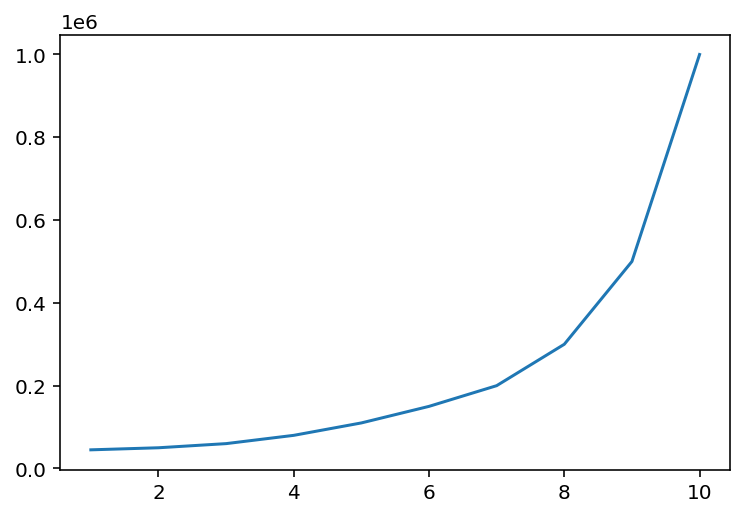

In [7]:
plt.plot(X, y)
plt.show()

## Building Model

In [8]:
pipeline = Pipeline(steps=[
    ("poly", PolynomialFeatures(degree=1)),
    ("linear_reg", LinearRegression())
])

pipeline_2 = Pipeline(steps=[
    ("poly", PolynomialFeatures(degree=2)),
    ("linear_reg", LinearRegression())
])

pipeline_3 = Pipeline(steps=[
    ("poly", PolynomialFeatures(degree=3)),
    ("linear_reg", LinearRegression())
])

In [9]:
pipeline.fit(X, y)
pipeline_2.fit(X, y)
pipeline_3.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [10]:
X_poly = pipeline_2[0].transform(X)
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [11]:
y_pred = pipeline.predict(X)
y_pred_2 = pipeline_2.predict(X)
y_pred_3 = pipeline_3.predict(X)

## Checking results

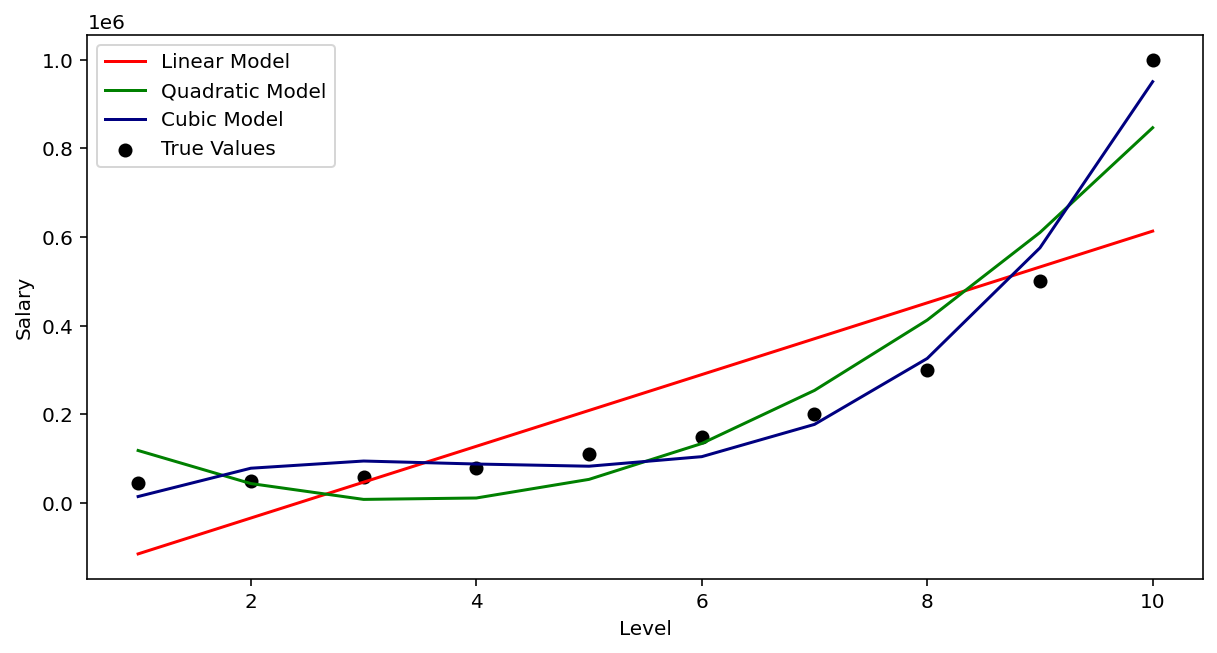

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
plt.scatter(X, y, color="black", label="True Values")
plt.plot(X, y_pred, color="red", label="Linear Model")
plt.plot(X, y_pred_2, color="green", label="Quadratic Model")
plt.plot(X, y_pred_3, color="navy", label="Cubic Model")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [13]:
models = ["Linear", "Quadratic", "Cubic"]

for pred, model in zip([y_pred, y_pred_2, y_pred_3], models):
    print(">>>> "+model)
    print(f"R2 Score: {r2_score(y, pred):.3f}")
    print(f"RMSE Score: {np.sqrt(mean_squared_error(y, pred)):.0f}")
    print()

>>>> Linear
R2 Score: 0.669
RMSE Score: 163389

>>>> Quadratic
R2 Score: 0.916
RMSE Score: 82212

>>>> Cubic
R2 Score: 0.981
RMSE Score: 38932



In [14]:
level = 6.5

print(f"######## Prediction for level {level} ########")
for pipe, model in zip([pipeline, pipeline_2, pipeline_3], models):
    pred = pipe.predict(np.array([level]).reshape(-1,1))[0]
    print(f">>> {model}: {pred:.2f}")

######## Prediction for level 6.5 ########
>>> Linear: 330378.79
>>> Quadratic: 189498.11
>>> Cubic: 133259.47
